Função para preparar os diretórios dos arquivos para o formato necessário para o TensorFlow.

In [5]:
import os

def prepare_directories(directory_path, class_names):
    #Certificando-se  que o caminho do diretório fornecido existe.
    if not os.path.exists(directory_path):
        raise ValueError(f"Directory '{directory_path}' does not exist.")

    for class_name in class_names:
        target_dir = os.path.join(directory_path, class_name)
        if not os.path.exists(target_dir):
            os.makedirs(target_dir)
            print(f"Created directory: {target_dir}")
        else:
            print(f"Directory already exists: {target_dir}")


In [6]:
directory_path = 'C:/Users/patym/OneDrive/Área de Trabalho/Ati. 04/animals'
class_names = ['cats', 'dogs', 'panda']

prepare_directories(directory_path, class_names)


Directory already exists: C:/Users/patym/OneDrive/Área de Trabalho/Ati. 04/animals\cats
Directory already exists: C:/Users/patym/OneDrive/Área de Trabalho/Ati. 04/animals\dogs
Directory already exists: C:/Users/patym/OneDrive/Área de Trabalho/Ati. 04/animals\panda


Fazendo uma rede convolucional do zero em TensorFlow.

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models


In [8]:
from keras.preprocessing.image import ImageDataGenerator

# Defina as dimensões desejadas para as imagens
image_height = 128
image_width = 128

batch_size = 32

train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

train_generator = train_data_gen.flow_from_directory(
    'C:/Users/patym/OneDrive/Área de Trabalho/Ati. 04/animals',
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = validation_data_gen.flow_from_directory(
    'C:/Users/patym/OneDrive/Área de Trabalho/Ati. 04/animals',
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='binary'
)

Found 3000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


In [9]:

# Normalizar os valores dos pixels para ficarem entre 0 e 1
sample_image = train_generator[0][0][0]  # Obtém a primeira imagem do primeiro lote
normalized_sample_image = sample_image / 255.0


In [10]:
# Construindo o modelo de rede convolucional
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

# Adicionando as  camadas densas em cima
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation = 'sigmoid')) # Fazendo uma classificação binária


In [11]:
# Compilar e treinar o modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy', 
              metrics=['accuracy'])


In [12]:

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
94/94 [==============================] - 280s 3s/step - loss: -355477.7500 - accuracy: 0.3333 - val_loss: -2226894.5000 - val_accuracy: 0.3333
Epoch 2/10
94/94 [==============================] - 222s 2s/step - loss: -17772228.0000 - accuracy: 0.3333 - val_loss: -76798096.0000 - val_accuracy: 0.3333
Epoch 3/10
94/94 [==============================] - 212s 2s/step - loss: -521366176.0000 - accuracy: 0.3333 - val_loss: -1556861824.0000 - val_accuracy: 0.3333
Epoch 4/10
94/94 [==============================] - 191s 2s/step - loss: -5329127936.0000 - accuracy: 0.3333 - val_loss: -11067940864.0000 - val_accuracy: 0.3333
Epoch 5/10
94/94 [==============================] - 193s 2s/step - loss: -25866846208.0000 - accuracy: 0.3333 - val_loss: -46062759936.0000 - val_accuracy: 0.3333
Epoch 6/10
94/94 [==============================] - 191s 2s/step - loss: -81474068480.0000 - accuracy: 0.3333 - val_loss: -135257890816.0000 - val_accuracy: 0.3333
Epoch 7/10
94/94 [======================

Pegar uma rede pré treinada (Transfer Learning) e avaliar no dataset;

In [148]:
import numpy as np
from tensorflow.keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Carregaando uma rede pré-treinada ResNet50 (sem as camadas totalmente conectadas)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Adicionar camadas personalizadas no topo do modelo
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

# Criando o modelo final
model = Model(inputs=base_model.input, outputs=predictions)

# Compilando o modelo
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Carregando e pré-processar os dados
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
train_generator = train_datagen.flow_from_directory(
    'C:/Users/patym/OneDrive/Área de Trabalho/Ati. 04/animals',
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='categorical')

# Avaliando o modelo no conjunto de teste
evaluation = model.evaluate(train_generator)
print("Teste de Perda:", evaluation[0])
print("Teste de Acurácia:", evaluation[1])

Found 3000 images belonging to 3 classes.
94/94 [==============================] - 184s 2s/step - loss: 2.1041 - accuracy: 0.2793
Teste de Perda: 2.1040666103363037
Teste de Acurácia: 0.27933332324028015


Avaliar métodos de regularização e data augmentation;

A principal distinção nos resultados entre construir uma rede neural do zero e aplicar Transfer Learning reside na eficiência do treinamento. O Transfer Learning tende a se destacar quando você dispõe de um conjunto de dados limitado, pois aproveita os padrões aprendidos em um conjunto de dados mais amplo e genérico. Por outro lado, criar uma rede neural do zero oferece mais flexibilidade e personalização, mas pode apresentar maior susceptibilidade ao overfitting quando os dados são escassos.

De modo geral, o Transfer Learning é uma abordagem amplamente adotada e eficaz para muitos desafios de aprendizado profundo, especialmente quando não se dispõe de um grande conjunto de dados para treinar uma rede do zero. Entretanto, o sucesso dessa abordagem depende da escolha cuidadosa da arquitetura pré-treinada e das camadas adicionadas para se adaptarem ao problema específico em questão.

Transfer Learning com uma Rede Pré-Treinada:
Prós:
Pode usar os recursos de extração de características aprendidos em um conjunto de dados muito grande.
Pode ser eficaz mesmo com conjuntos de dados menores, reduzindo o risco de overfitting.
Geralmente requer menos tempo de treinamento em comparação com treinar uma rede do zero.

Contras:
Pode haver alguma perda de personalização, já que a rede pré-treinada foi projetada para um problema diferente.
As camadas iniciais da rede pré-treinada podem ser muito específicas para características de baixo nível em imagens, o que pode ou não ser relevante para o seu problema.

Rede Convolucional do Zero
Prós:
A rede é totalmente personalizada para o seu problema.
Você pode ajustar os hiperparâmetros livremente para a tarefa.

Contras:
Pode exigir um grande conjunto de dados para evitar o overfitting.
Pode ser mais demorado do que o Transfer Learning.










Fazer uma função de pré-processamento dos dados usando SpaCy, NLTK e/ou RegEx (lowercasing, remover pontuações, stopwords, lemmatize, etc);

In [18]:
# importação das bibliotecas para a entrada dos dados;
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# importação dos dados 
data = pd.read_csv('Musical_instruments_reviews.csv')
data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [20]:
data.shape # numero de colunas e linhas


(10261, 9)

In [21]:
np.sum(data.duplicated()) # verificando se tem valores duplicados

0

In [22]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def nuvem_palavras(textos):
    
    # Juntando todos os textos na mesma string
    todas_palavras = ' '.join([texto for texto in textos])
    # Gerando a nuvem de palavras
    nuvem_palvras = WordCloud(width= 800, height= 500,
                              max_font_size = 110,
                              collocations = False).generate(todas_palavras)
    # Plotando nuvem de palavras
    plt.figure(figsize=(24,12))
    plt.imshow(nuvem_palvras, interpolation='bilinear')
    plt.axis("off")
    plt.show()

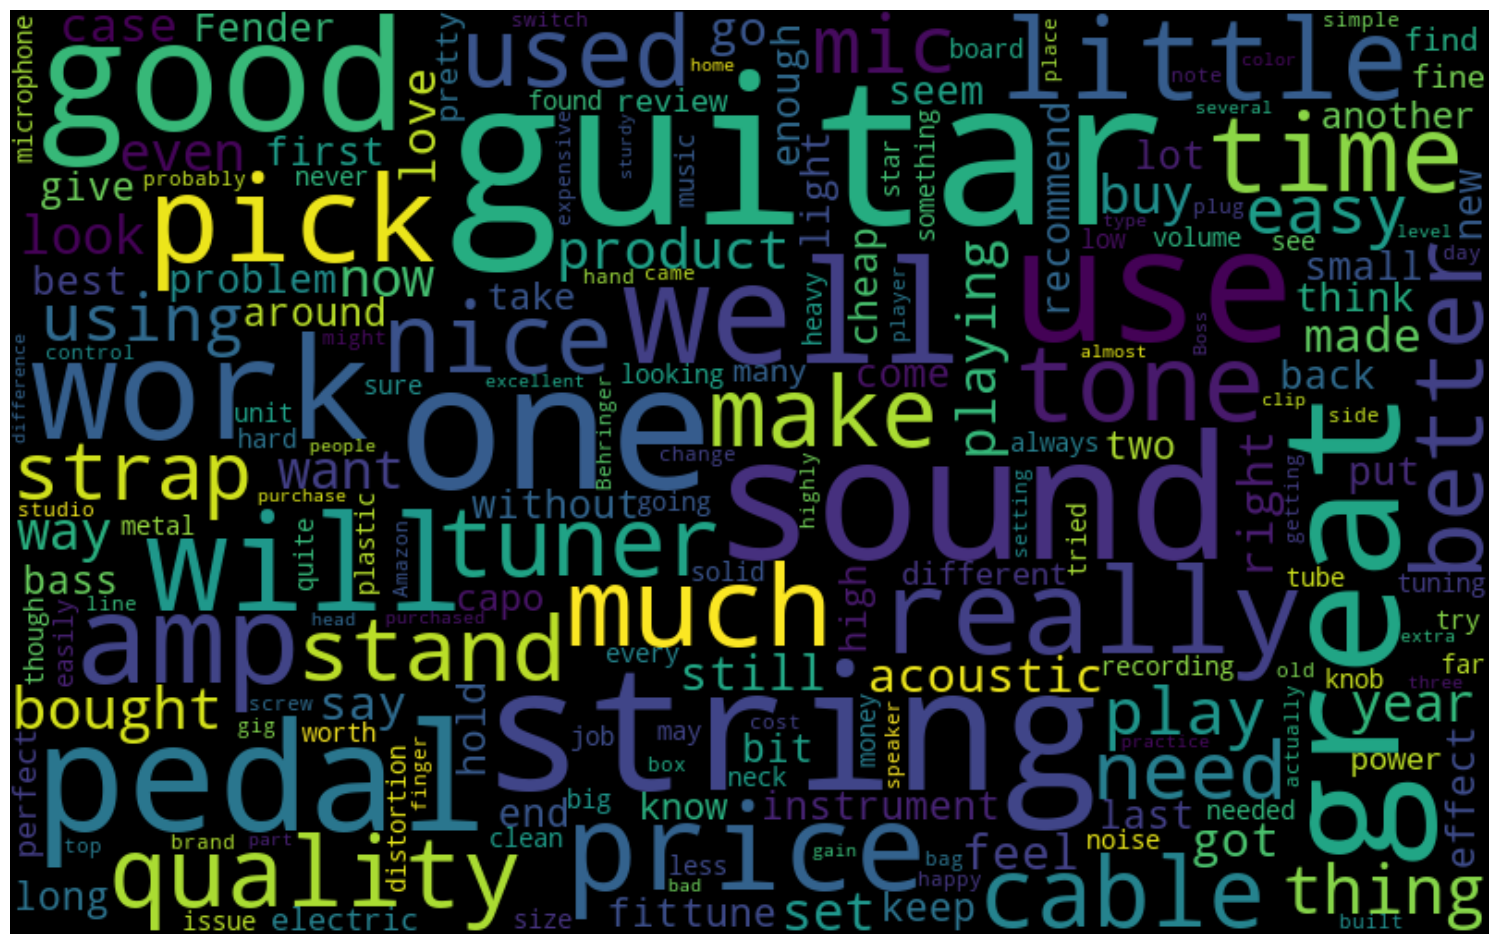

In [23]:
# Convertendo a coluna de float para string
data['reviewText'] = data['reviewText'].astype(str)
# Construindo a nuvem de palavra
nuvem_palavras(data["reviewText"])

considerando também a adição da palavra "música" como relevante, uma vez que se trata de análise de reviews de músicas.

CountVectorizer e TfidfVectorizer
Após a realização da limpeza dos textos é necessário transformar o dataset número para aplicar algum algoritmo de aprendizagem. Para tal, vamos apresentar duas técnicas: CountVectorizer e TfidfVectorizer.

In [24]:
def countvectorizer(textos):

    vect = CountVectorizer()
    text_vect = vect.fit_transform(textos)
    
    return text_vect

def tfidfvectorizer(textos):
    
    vect = TfidfVectorizer(max_features=50)
    text_vect = vect.fit_transform(textos)
    
    return text_vect

O foco nessa etapa é de preparação de um dataset limpo para a criação futura de modelos;

Classe de Pré-processamento para NLP

In [25]:
import nltk

# Download do 'punkt' tokenizer 
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\patym\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
import nltk
nltk.download('stopwords')
nltk.download('stopwords', download_dir='C:/Users/patym/OneDrive/Área de Trabalho/Ati. 04')
import ssl

ssl._create_default_https_context = ssl._create_default_https_context
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\patym\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:/Users/patym/OneDrive/Área de Trabalho/Ati. 04...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\patym\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
import re
from unidecode import unidecode
import spacy
import nltk
from nltk.corpus import stopwords
from spacy.lang.pt.stop_words import STOP_WORDS
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string  

class preprocess_nlp(object):
    
    def __init__(self, texts, stopwords = True, lemma=False, stem=False, wordcloud=True, numeric='tfidf'):
        
        self.texts = texts
        self.stopwords = stopwords
        self.lemma = lemma
        self.stem = stem
        self.wordcloud = wordcloud
        self.numeric = numeric
        self.new_texts = None
        self.stopwords_list = list()
        
    def clean_text(self):

        new_texts = list()

        for text in self.texts:

            text = text.lower()
            text = re.sub('@[^\s]+', '', text)
            text = unidecode(text)
            text = re.sub('<[^<]+?>','', text)
            text = ''.join(c for c in text if not c.isdigit())
            text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))', '', text)
            text = ''.join(c for c in text if c not in string.punctuation)
            new_texts.append(text)
        
        self.new_texts = new_texts

    def create_stopwords(self):
        
        stop_words = list(set(stopwords.words('portuguese') + list(STOP_WORDS)))
        
        for word in stop_words:

            self.stopwords_list.append(unidecode(word))
       
    
    def add_stopword(self, word):
        
        self.stopwords_list += [word]
        

    def remove_stopwords(self):

        new_texts = list()

        for text in self.new_texts:

            new_text = ''

            for word in word_tokenize(text):

                if word.lower() not in self.stopwords_list:

                    new_text += ' ' + word

            new_texts.append(new_text)

        self.new_texts = new_texts


    def extract_lemma(self):
        
        nlp = spacy.load("pt_core_news_sm")
        new_texts = list()

        for text in self.texts:

            new_text = ''

            for word in nlp(text):

                new_text += ' ' + word.lemma_

            new_texts.append(new_text)
        
        self.new_texts = new_texts
    

    def extract_stem(self):

        stemmer = nltk.stem.SnowballStemmer('portuguese')
        new_texts = list()

        for text in self.texts:

            new_text = ''

            for word in word_tokenize(text):

                new_text += ' ' + stemmer.stem(word)

            new_texts.append(new_text)

        self.new_texts = new_texts
    

    def word_cloud(self):

        all_words = ' '.join([text for text in self.new_texts])
        word_cloud = WordCloud(width= 800, height= 500,
                               max_font_size = 110,
                               collocations = False).generate(all_words)
        plt.figure(figsize=(24,12))
        plt.imshow(word_cloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
        

    def countvectorizer(self):

        vect = CountVectorizer()
        text_vect = vect.fit_transform(self.new_texts)

        return text_vect
    

    def tfidfvectorizer(self):

        vect = TfidfVectorizer(max_features=50)
        text_vect = vect.fit_transform(self.new_texts)

        return text_vect
    
    
    def preprocess(self):

        self.clean_text()
        
        if self.stopwords == True:
            self.create_stopwords()
            self.remove_stopwords()
            
        if self.lemma == True:
            self.extract_lemma()
        
        if self.stem == True:
            self.extract_stem() 
        
        if self.wordcloud == True:
            self.word_cloud()
        
        if self.numeric == 'tfidf':
            text_vect = self.tfidfvectorizer()
        elif self.numeric == 'count':
            text_vect = self.countvectorizer()
        else:
            print('metodo nao mapeado!')
            exit()
            
        return text_vect

Ao criar esta classe, defini argumentos opcionais que determinam as etapas de pré-processamento a serem executadas. Por padrão, essas etapas incluirão a remoção das palavras de parada, a limpeza do texto, a geração da nuvem de palavras e a aplicação do TfidfVectorizer.

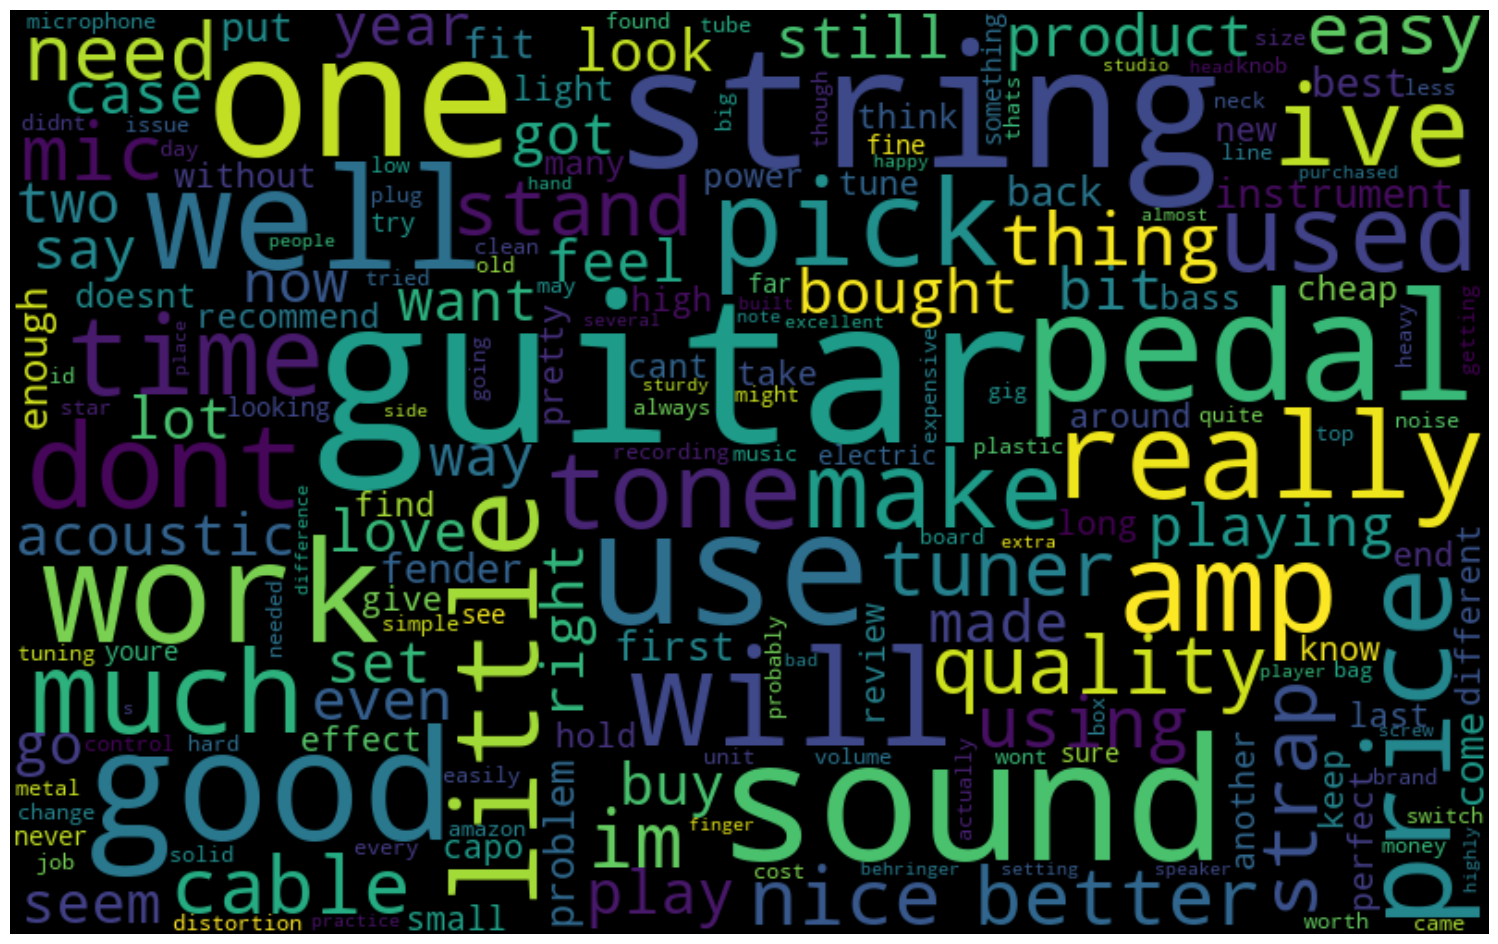

In [151]:
import string 
from unidecode import unidecode
prepro = preprocess_nlp(data['reviewText'], numeric='count')
prepro.add_stopword('great') 
prepro.add_stopword('great') 
sparse_matrix = prepro.preprocess()



Para verificarmos se nossa função de preparação está funcionando, vamos criar um pequeno texto com as informações que queremos remover e analisar.

In [29]:
import nltk
nltk.download('stopwords')
nltk.download('stopwords', download_dir='C:/Users/patym/OneDrive/Área de Trabalho/Ati. 04')
import ssl

ssl._create_default_https_context = ssl._create_default_https_context
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\patym\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:/Users/patym/OneDrive/Área de Trabalho/Ati. 04...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\patym\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

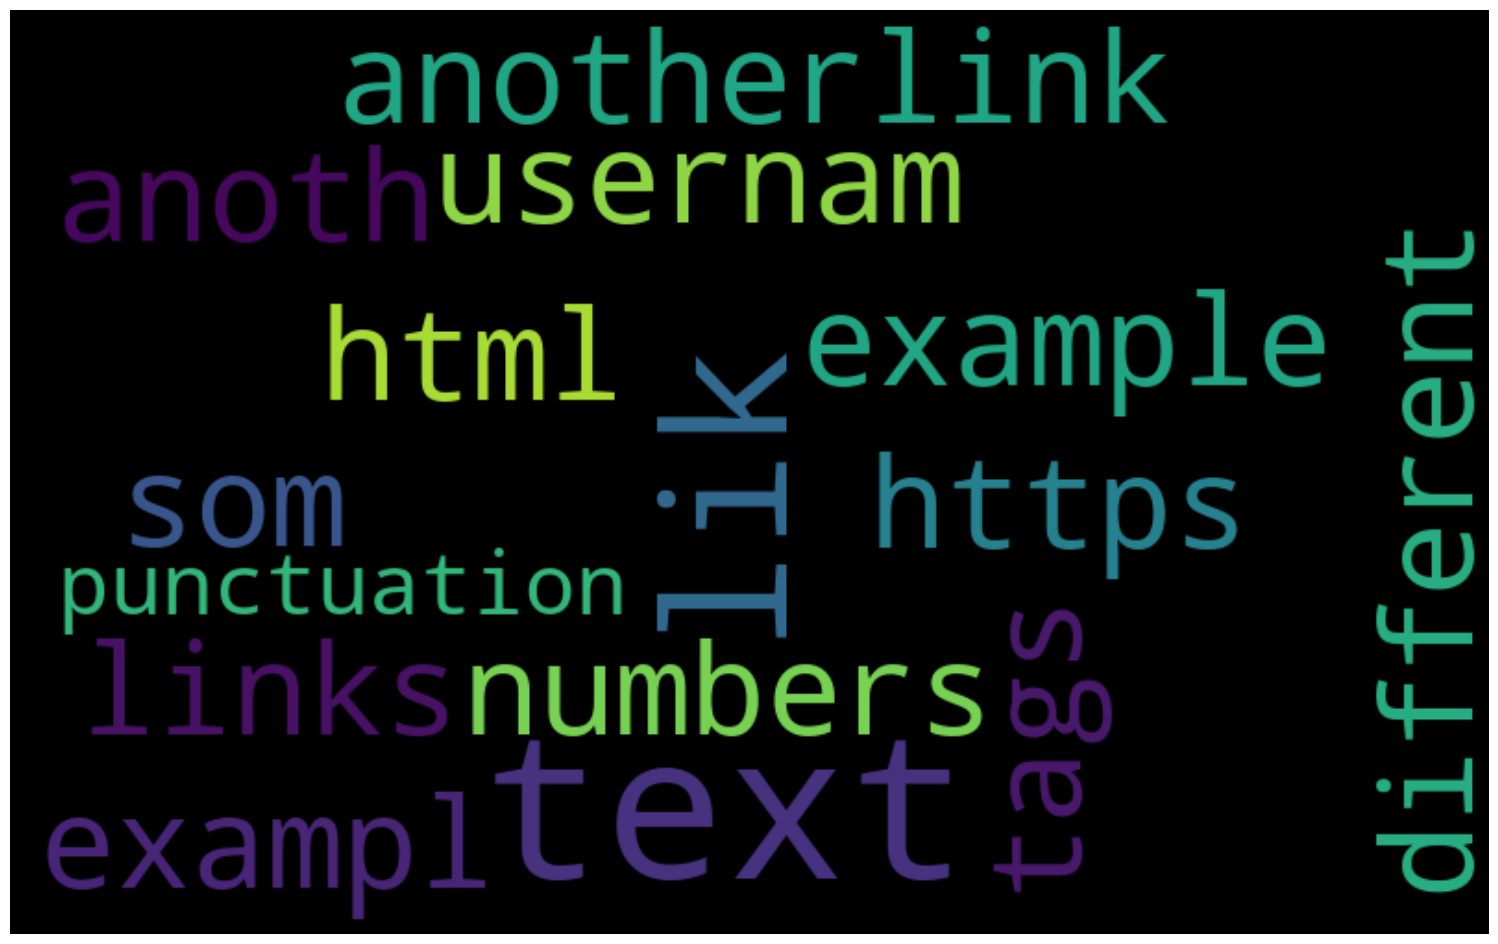

Cleaned and Preprocessed Texts:
Text 1:  this is an exampl text with som @ usernam and < html > tags .
Text 2:  anoth text with links lik http : //example.com and https : //anotherlink.com .
Text 3:  a different text with numbers lik 12345 and punctuation !


In [30]:
# Exemplo de texto
texts = [
    "This is an example text with some @usernames and <html> tags.",
    "Another text with links like http://example.com and https://anotherlink.com.",
    "A different text with numbers like 12345 and punctuation!"
]

# Criando uma instância da classe preprocess_nlp
preprocessor = preprocess_nlp(texts, stopwords=True, lemma=True, stem=True, wordcloud=True, numeric='tfidf')
text_vect = preprocessor.preprocess()
cleaned_texts = preprocessor.new_texts

# Print
print("Cleaned and Preprocessed Texts:")
for idx, text in enumerate(cleaned_texts, start=1):
    print(f"Text {idx}: {text}")


Nossa função passou no teste! Agora podemos pré-processar os titles usando a função text_prepare para os conjuntos de dados de treino e validação.

In [31]:
# Separarando os dados em conjuntos de treinamento e validação
train_size = 0.8  
train_len = int(train_size * len(data))

train = data[:train_len]
validation = data[train_len:]

# separando os dados de treino
X_train, y_train = train['reviewerName'].values, train['summary'].values

# separando os dados de validação
X_val, y_val = validation['reviewerName'].values, validation['summary'].values

# visualizando X_train
X_train[:10]

array(['cassandra tu "Yeah, well, that\'s just like, u...', 'Jake',
       'Rick Bennette "Rick Bennette"', 'RustyBill "Sunday Rocker"',
       'SEAN MASLANKA', 'Bill Lewey "blewey"', 'Brian',
       'Fender Guy "Rick"', 'G. Thomas "Tom"', 'Kurt Robair'],
      dtype=object)

In [32]:
from collections import Counter
from itertools import chain

#Convertendo quaisquer elementos que não sejam strings em X_train para strings
X_train = [str(item) for item in X_train]

# realizando a contagem e inserindo em um dicionário
words_counts = Counter(chain.from_iterable([i.split(" ") for i in X_train]))

# ordenando do maior para o menor
words_freq = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)

words_freq[:10]

[('David', 170),
 ('A.', 167),
 ('J.', 165),
 ('D.', 152),
 ('M.', 131),
 ('Customer', 118),
 ('Michael', 110),
 ('S.', 110),
 ('R.', 109),
 ('Amazon', 107)]

visualizar em forma de gráfico, pois ficará mais visível e intuitivo.

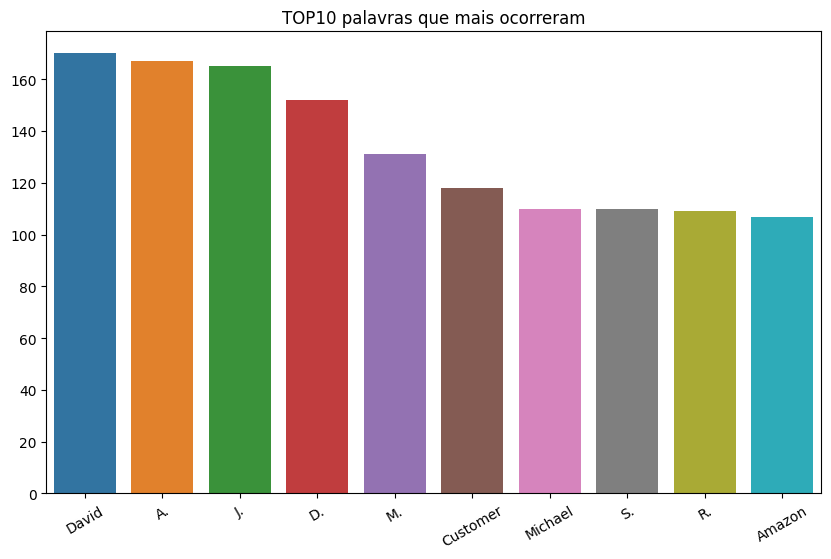

In [33]:
import seaborn as sns


# colocando as palavras em um objeto do tipo lista
words_list = list(dict(words_freq[:10]).keys())

# colocando as ocorrências em um objeto do tipo lista
occur_list = list(dict(words_freq[:10]).values())

# definindo a área de plotagem
plt.figure(figsize=(10,6))

# criando o gráfico
ax = sns.barplot(x = words_list, y = occur_list)

# inserindo o título
ax.set_title('TOP10 palavras que mais ocorreram')

# rotacionando os rótulos do eixo x
plt.xticks(rotation=30);

Da mesma forma vamos fazer todo esse processo de contagem para as tags.

In [35]:
# realizando a contagem e inserindo em um dicionário
tags_counts = Counter(chain.from_iterable([i for i in y_train]))

# ordenando do maior para o menor
tags_freq = sorted(tags_counts.items(), key=lambda x: x[1], reverse=True)

tags_freq[:10]

[(' ', 27430),
 ('e', 18020),
 ('t', 14293),
 ('o', 12267),
 ('a', 11688),
 ('r', 11218),
 ('i', 9795),
 ('s', 9305),
 ('n', 8007),
 ('l', 6814)]

Transformando texto em vetor

In [36]:

from sklearn.feature_extraction.text import CountVectorizer

# Substituir valores NaN por uma string vazia
X_train = pd.Series(X_train).fillna("")
X_val = pd.Series(X_val).fillna("")

# definindo um limite
max_features = 5000

# instanciando o vetorizador
vectorizer = CountVectorizer(max_features = max_features)

# aplicando a transformação
X_train_bow = vectorizer.fit_transform(X_train)
X_val_bow = vectorizer.transform(X_val)

# checando o shape
print('X_train shape:', X_train_bow.shape)
print('X_val shape:  ', X_val_bow.shape)

X_train shape: (8208, 1823)
X_val shape:   (2053, 1823)


Podemos certificar, como foi dito, que a construção resultou em uma matriz com 1823 colunas, que nós limitamos, em ambos os conjuntos, treino e validação.

TF-IDF 
Continuando, uma abordagem que se estende à estrutura da Bag of Words é capturar as frequencias relativas das palavras, pois ajuda a penalizar as palavras muito frequentes e otimiza o uso das melhores.

In [38]:
# instanciando o tfidf
tfidf_vec = TfidfVectorizer(token_pattern = '(\S+)', min_df = 5, max_df = .9, ngram_range = (1,2))

# aplicando o modelo com fit_transform aos dados de treino
X_train_tfidf = tfidf_vec.fit_transform(X_train)

# aplicando o modelo com transform aos dados de validação
X_val_tfidf = tfidf_vec.transform(X_val)

# coletando o palavras
tfidf_vocab = tfidf_vec.vocabulary_

# invertendo o dicionário para termos a quantidade como chaves
tfidf_reversed_vocab = {i:word for word,i in tfidf_vocab.items()}

Multilabel Classifier
Chegou  o momento de treinar o modelo para fazer previsões, após deixar o conjunto nas formas necessárias.
Para modelar essa predição, precisa converter a nossa variável alvo em binário, ou seja, a previsão será 0 e 1 e para isso será utilizado o algoritmo MultiLabelBinarizer do sklearn.

In [39]:
from sklearn.preprocessing import MultiLabelBinarizer

# instanciando o modelo
mlb = MultiLabelBinarizer(classes = sorted(tags_counts.keys()))

# convertendo rótulos de treino com fit_transform
y_train = mlb.fit_transform(y_train)

# transformando dados de validação com fit_transform
y_val = mlb.fit_transform(y_val)

c:\Users\patym\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:900: UserWarning: unknown class(es) ['`'] will be ignored
  warnings.warn(


In [40]:
# checando os 3 primeiros elementos das tags de treino
y_train[:3]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]])

In [41]:
# checando os 3 primeiros elementos das tags de validação
y_val[:3]


array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0]])

In [42]:
# olhando as classes
mlb.classes_

array([' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',',
       '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ':', ';', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G',
       'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
       'U', 'V', 'W', 'X', 'Y', 'Z', '[', ']', 'a', 'b', 'c', 'd', 'e',
       'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r',
       's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '~'], dtype=object)

Treinando e testando

In [43]:
# criando a função
def train_classifier(X_train, y_train, C=2.5, penalty='l2'):
    
    # instanciando a regressão logística
    logreg = LogisticRegression(C=C, penalty=penalty, max_iter=2000)

    
    # intanciando o modelo de um contra todos com a regressão logística
    one_vs_rest = OneVsRestClassifier(logreg).fit(X_train, y_train)
    
    # retornando o instancia do modelo
    return one_vs_rest

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier


# treinando um classificador com bow
classifier_bow = train_classifier(X_train_bow, y_train)

# treinando um classificador com tf-idf
classifier_tfidf = train_classifier(X_train_tfidf, y_train)

In [45]:
# realizando as previsões com labels
y_val_predicted_labels_bow = classifier_bow.predict(X_val_bow)

# realizando as previsões com scores
y_val_predicted_scores_bow = classifier_bow.decision_function(X_val_bow)

# realizando as previsões com labels
y_val_predicted_labels_tfidf = classifier_tfidf.predict(X_val_tfidf)

# realizando as previsões com scores
y_val_predicted_scores_tfidf = classifier_tfidf.decision_function(X_val_tfidf)

Agora veja como um classificador que usa o TF-IDF funciona, alguns exemplos

In [46]:
y_val_pred_inversed = mlb.inverse_transform(y_val_predicted_labels_tfidf)
y_val_inversed = mlb.inverse_transform(y_val)
for i in range(5):
    print('Title:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
        X_val[i],
        ','.join(y_val_inversed[i]),
        ','.join(y_val_pred_inversed[i])
    ))

Title:	MAURICIO S TAVARES
True labels:	 ,4,a,b,c,e,h,k,m,o,r,s,t,u
Predicted labels:	 ,a,e,l,o,r,s,t


Title:	M. Henry
True labels:	 ,L,e,i,o,t,v
Predicted labels:	 ,a,c,d,e,h,i,n,o,p,r,s,t,u


Title:	Michael Broshar
True labels:	 ,D,T,c,e,n,r,t,u
Predicted labels:	 ,N,a,c,e,i,o,r,t


Title:	Michael W DeSilva
True labels:	 ,E,a,c,e,g,i,l,n,r,s,t,u,x
Predicted labels:	 ,a,c,e,n,o,r,t


Title:	Michael W.
True labels:	 ,-,1,N,S,T,a,e,k,n,r,u
Predicted labels:	 ,a,d,e,i,l,n,o,r,s,t,u




Avaliação

In [61]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score

# criando a função para avaliação
def print_evaluation_scores(y_val, predicted):
    
    # calculando a acuracia
    print("Accuracy score :",accuracy_score(y_true=y_val,y_pred=predicted))
    
    # calculando f1 score
    print("F1 averaged score :",np.mean(np.array(f1_score(y_true=y_val, y_pred=predicted, average = 'micro'))))
    
    # calculando a precision score
    print("Precision score :",average_precision_score(y_true=y_val, y_score=predicted, average = 'weighted'))

In [62]:
print('Bag-of-words')
print('---------------------------------------------')
print_evaluation_scores(y_val, y_val_predicted_labels_bow)
print('=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=')
print('\nTfidf')
print('---------------------------------------------')
print_evaluation_scores(y_val, y_val_predicted_labels_tfidf)
print('=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=')

Bag-of-words
---------------------------------------------
Accuracy score : 0.000974184120798831
F1 averaged score : 0.6000746166080861


c:\Users\patym\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Users\patym\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Users\patym\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Users\patym\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


Precision score : 0.516538974940009
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

Tfidf
---------------------------------------------
Accuracy score : 0.0004870920603994155
F1 averaged score : 0.5969321083211033
Precision score : 0.51109419462905
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


c:\Users\patym\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Users\patym\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Users\patym\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Users\patym\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


 o mais que se encontra são classificações binárias com esse classificador, a proposta foi trazer algo diferente relacionado também ao estudo de NLP, e podemos também utilizar outras formas para melhorar ainda mais o resultado do nosso modelo, como tunar o tf-idf e outros parâmetros da Regressão Logística ou até mesmo utilizar outro modelo.

Construindo um modelo LSTM com Incorporações usando o Keras.

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D, Bidirectional
from tensorflow.keras.layers import Conv1D, Flatten, GRU, GlobalAveragePooling1D, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from tensorflow.keras.optimizers import Adam, AdamW
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

In [130]:
def plot_history(history):
    plt.figure(figsize=(10, 4))

    # Gráfico de Perda
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Treinamento de Perda')
    plt.plot(history.history['val_loss'], label='Validação de Perda')
    plt.title('Perda de Treinamento e Validação')
    plt.xlabel('Epoch')
    plt.ylabel('Perda')
    plt.legend()
    plt.grid()
    # Gráfico da Acurácia 
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Treinanmento da  Acurácia')
    plt.plot(history.history['val_accuracy'], label='Validação da  Acurácia')
    plt.title('Precisão de Treinamento e Validação')
    plt.xlabel('Epoch')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

In [152]:
%%time

# Preparando os dados para a sequência
NUM_WORDS = 30_000
MAX_SEQUENCE_LENGTH = 32
OOV_TOKEN = '<OOV>'
PADDING = 'post'

tokenizer = Tokenizer(num_words=NUM_WORDS, split=' ', oov_token=OOV_TOKEN)
tokenizer.fit_on_texts(data["reviewText"])
X = tokenizer.texts_to_sequences(data["reviewText"])
X = pad_sequences(X, maxlen = MAX_SEQUENCE_LENGTH, padding=PADDING, truncating=PADDING)

Y = pd.get_dummies(data['overall']).values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, stratify=data["overall"], test_size = 0.1, random_state = 43, shuffle=True)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

class_weights = compute_class_weight(class_weight = "balanced", 
                                     classes = np.unique(Y.argmax(axis=1)), y = Y.argmax(axis=1))
class_weights = dict(zip(np.unique(Y.argmax(axis=1)), class_weights)) 
print("class_weights: ", class_weights)

vocab_size = len(tokenizer.word_index) + 1

(9234, 32) (9234, 5)
(1027, 32) (1027, 5)
class_weights:  {0: 9.457142857142857, 1: 8.2088, 2: 2.6582901554404144, 3: 0.9847408829174664, 4: 0.29579129432113}
CPU times: total: 2.02 s
Wall time: 3.35 s


In [153]:
# Construindo o modelo
def build_model(vocab_size, max_seq_len):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, # Tamanho do vocabulário
                        output_dim=32, # Comprimento do vetor para cada palavra
                        input_length=max_seq_len)) # Comprimento máximo de uma sequência
    model.add(SpatialDropout1D(0.5))
    model.add(Flatten())
#     model.add(GlobalAveragePooling1D())

    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.8))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.8))
    model.add(Dense(Y_train.shape[1], activation='softmax'))
    model.compile(loss = 'categorical_crossentropy', 
                  optimizer=AdamW(learning_rate=0.001), 
                  metrics = ['accuracy'])
    print(model.summary())
    return model

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 32, 32)            691968    
                                                                 
 spatial_dropout1d_6 (Spati  (None, 32, 32)            0         
 alDropout1D)                                                    
                                                                 
 flatten_8 (Flatten)         (None, 1024)              0         
                                                                 
 dense_44 (Dense)            (None, 512)               524800    
                                                                 
 dropout_13 (Dropout)        (None, 512)               0         
                                                                 
 dense_45 (Dense)            (None, 256)               131328    
                                                     

c:\Users\patym\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\patym\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


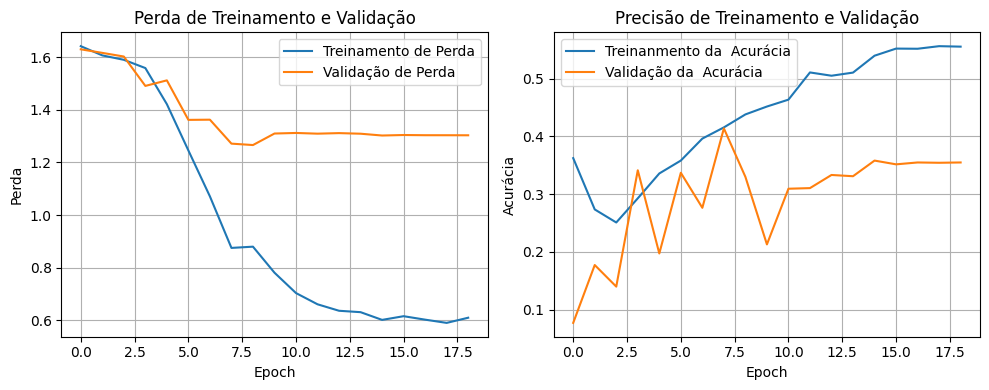

CPU times: total: 17min 31s
Wall time: 7min 15s


In [154]:
%%time
batch_size = 16

model = build_model(vocab_size, MAX_SEQUENCE_LENGTH)

history = model.fit(X_train, Y_train, 
                    class_weight=class_weights, # Correção do desequilíbrio de classes
                    epochs = 25, batch_size=batch_size, validation_split=0.2,
                    callbacks=[
                        EarlyStopping(monitor = "val_loss", patience = 10, restore_best_weights = True),
                        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, mode='min') 
                    ]
                   )

y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(Y_test, y_pred.round()))
print('F1 score:', f1_score(Y_test, y_pred.round(), average='weighted'))
print('ROC-AUC:', roc_auc_score(Y_test, y_pred.round()))
print(classification_report(Y_test, y_pred.round())) 

plot_history(history)

In [128]:
def build_model(vocab_size, max_seq_len):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, # Tamanho do vocabulário
                        output_dim=32, # Comprimento do vetor para cada palavra
                        input_length=max_seq_len)) # Comprimento máximo de uma sequência
    model.add(SpatialDropout1D(0.5))
    model.add(Bidirectional(LSTM(32, recurrent_dropout=0.0, dropout=0.5, return_sequences=True)))
    model.add(Bidirectional(LSTM(16, recurrent_dropout=0.0, dropout=0.5)))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.8))
    model.add(Dense(Y_train.shape[1],activation='softmax'))
    model.compile(loss = 'categorical_crossentropy', 
                  optimizer=AdamW(learning_rate=0.001), 
                  metrics = ['accuracy'])
    print(model.summary())
    return model

In [129]:
%%time
batch_size = 64

model = build_model(vocab_size, MAX_SEQUENCE_LENGTH)

history = model.fit(X_train, Y_train, 
                    class_weight=class_weights, # Correção do desequilíbrio de classes
                    epochs = 25, batch_size=batch_size, validation_split=0.2,
                    callbacks=[
                        EarlyStopping(monitor = "val_loss", patience = 10, restore_best_weights = True),
                        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, mode='min') 
                    ]
                   )

y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(Y_test, y_pred.round()))
print('F1 score:', f1_score(Y_test, y_pred.round(), average='weighted'))
print('ROC-AUC:', roc_auc_score(Y_test, y_pred.round()))
print(classification_report(Y_test, y_pred.round())) 

plot_history(history)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 32, 32)            691968    
                                                                 
 spatial_dropout1d_5 (Spati  (None, 32, 32)            0         
 alDropout1D)                                                    
                                                                 
 bidirectional_5 (Bidirecti  (None, 32, 64)            16640     
 onal)                                                           
                                                                 
 bidirectional_6 (Bidirecti  (None, 32)                10368     
 onal)                                                           
                                                                 
 dense_28 (Dense)            (None, 512)               16896     
                                                     

KeyboardInterrupt: 

In [88]:
def build_model(vocab_size, max_seq_len):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, #Tamanho do vocabulário
                        output_dim=32, #Comprimento do vetor para cada palavra
                        input_length=max_seq_len)) #Comprimento máximo de uma sequência
#     model.add(SpatialDropout1D(0.5))
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
#     model.add(GlobalMaxPooling1D())
    model.add(Bidirectional(LSTM(16, recurrent_dropout=0.0)))
    model.add(Dense(32, activation='relu'))
#     model.add(Dropout(0.5))
    model.add(Dense(Y_train.shape[1],activation='softmax'))
    model.compile(loss = 'categorical_crossentropy', 
                  optimizer=AdamW(learning_rate=0.001), 
                  metrics = ['accuracy'])
    print(model.summary())
    return model

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 32, 32)            691968    
                                                                 
 conv1d (Conv1D)             (None, 28, 128)           20608     
                                                                 
 bidirectional_2 (Bidirecti  (None, 32)                18560     
 onal)                                                           
                                                                 
 dense_12 (Dense)            (None, 32)                1056      
                                                                 
 dense_13 (Dense)            (None, 5)                 165       
                                                                 
Total params: 732357 (2.79 MB)
Trainable params: 732357 (2.79 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

c:\Users\patym\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


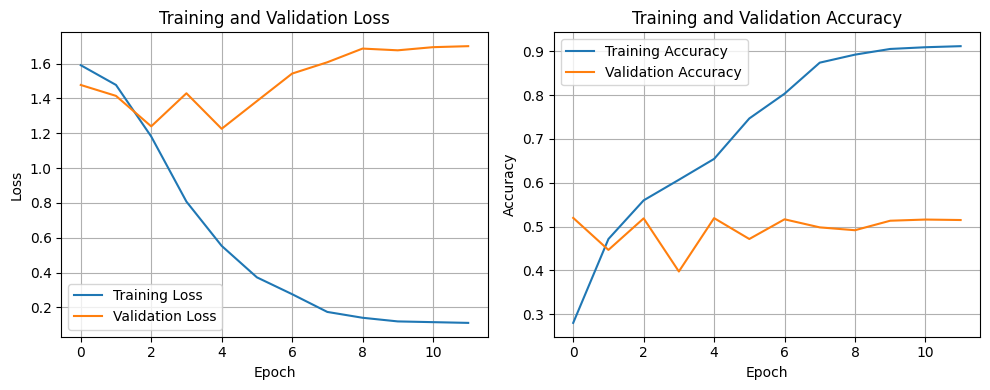

CPU times: total: 6min 34s
Wall time: 3min 20s


In [89]:
%%time
batch_size = 32
model = build_model(vocab_size, MAX_SEQUENCE_LENGTH)

print("class_weights: ", class_weights)
history = model.fit(X_train, Y_train, 
                    class_weight=class_weights, #Correção do desequilíbrio de classes
                    epochs = 25, batch_size=batch_size, validation_split=0.2,
                    callbacks=[
                        EarlyStopping(monitor = "val_loss", patience = 7, restore_best_weights = True),
                        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, mode='min') 
                    ]
                   )

y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(Y_test, y_pred.round()))
print('F1 score:', f1_score(Y_test, y_pred.round(), average='weighted'))
print('ROC-AUC:', roc_auc_score(Y_test, y_pred.round()))
print(classification_report(Y_test, y_pred.round())) 

plot_history(history)

In [90]:
def build_model(vocab_size, max_seq_len):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, # Tamanho do vocabulario
                        output_dim=32, #Comprimento do vetor para cada palavra
                        input_length=max_seq_len)) # Comprimento máximo de uma sequência
#     model.add(SpatialDropout1D(0.5))
    model.add(Bidirectional(GRU(32, return_sequences=True)))
    model.add(Bidirectional(LSTM(16, recurrent_dropout=0.0)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(Y_train.shape[1],activation='softmax'))
    model.compile(loss = 'categorical_crossentropy', 
                  optimizer=AdamW(learning_rate=0.001), 
                  metrics = ['accuracy'])
    print(model.summary())
    return model

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 32, 32)            691968    
                                                                 
 bidirectional_3 (Bidirecti  (None, 32, 64)            12672     
 onal)                                                           
                                                                 
 bidirectional_4 (Bidirecti  (None, 32)                10368     
 onal)                                                           
                                                                 
 dense_14 (Dense)            (None, 32)                1056      
                                                                 
 dense_15 (Dense)            (None, 5)                 165       
                                                                 
Total params: 716229 (2.73 MB)
Trainable params: 71622

c:\Users\patym\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


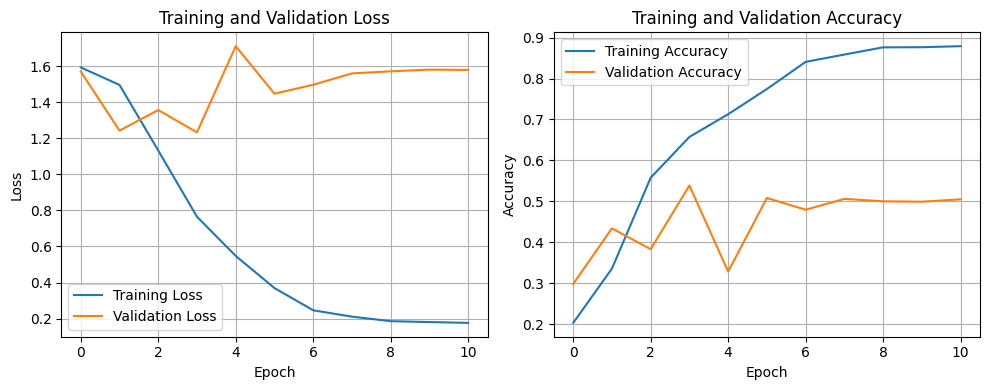

CPU times: total: 5min 21s
Wall time: 2min 49s


In [91]:
%%time
batch_size = 64

model = build_model(vocab_size, MAX_SEQUENCE_LENGTH)

print("class_weights: ", class_weights)
history = model.fit(X_train, Y_train, 
                    class_weight=class_weights, # fix class imbalance
                    epochs = 20, batch_size=batch_size, validation_split=0.2,
                    callbacks=[
                        EarlyStopping(monitor = "val_loss", patience = 7, restore_best_weights = True),
                        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, mode='min') 
                    ]
                   )

y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(Y_test, y_pred.round()))
print('F1 score:', f1_score(Y_test, y_pred.round(), average='weighted'))
print('ROC-AUC:', roc_auc_score(Y_test, y_pred.round()))
print(classification_report(Y_test, y_pred.round())) 

plot_history(history)

Fazer a tokenização dos textos usando o Tensorflow
(função Tokenizer e método text_to_sequences);


In [97]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [108]:
# Convertendo valores para strings
data['reviewerName'] = data['reviewerName'].astype(str)

# Criar uma instância do Tokenizer
tokenizer = Tokenizer()

# Ajustar o Tokenizer aos textos da coluna 'reviewerName'
tokenizer.fit_on_texts(data['reviewerName'])

# Converter textos em sequências de tokens
sequences = tokenizer.texts_to_sequences(data['reviewerName'])

# Exibir as sequências resultantes
for seq in sequences:
    print(seq)

[282, 283, 284, 175, 285, 65, 286, 287]
[342]
[24, 288, 24, 288]
[1265, 1266, 1267]
[108, 1268]
[71, 257, 258]
[39]
[259, 38, 24]
[8, 90, 91]
[451, 452]
[20, 61, 75, 76]
[83, 12]
[949]
[13]
[950]
[606, 607, 608]
[12, 22, 74]
[42, 25, 190, 524, 190]
[72]
[176]
[92]
[260, 525]
[609]
[14, 15, 26]
[1269, 1270, 1271]
[13, 951]
[526]
[610]
[10, 261]
[66, 386]
[4, 99]
[8, 19, 952]
[611]
[1272]
[93, 453, 93, 453]
[44]
[27, 224]
[24]
[5, 737, 9, 738, 191, 739, 192, 141]
[6, 1273]
[454, 262, 454]
[100]
[1, 740, 741]
[1274, 1275]
[14, 15]
[1269, 1270, 1271]
[387, 177, 388]
[193]
[208]
[12, 67, 157]
[12, 953]
[12, 954]
[4, 8]
[57, 158]
[57, 130]
[123, 64]
[955]
[37, 37]
[209, 210]
[1276, 5]
[1277]
[21, 31, 389, 956]
[62, 5, 957, 54]
[34, 455, 34, 455]
[612, 613, 34, 35]
[34, 456]
[457]
[958]
[614]
[101, 12]
[44]
[44]
[615]
[27, 224]
[131]
[13, 137, 138]
[1278]
[7, 7, 319]
[194]
[1279]
[390]
[29, 1280]
[616, 617, 263]
[1281]
[1282, 1283]
[5, 1284, 1285, 1286]
[28, 5, 320]
[5, 16, 132, 133]
[6, 959]